In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn


In [2]:
output_dir =  os.path.join('..', 'output')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [4]:
df = pd.read_csv('../data/human_eval/highvar_lowmer_lmer.csv', header=0, index_col=0)
print(df.shape)
df.head()

(48, 6)


,diff,ex,power,num.workers,Number of Items,settings
1,0.05,50,0.235,3,50,High var. settings
2,0.05,50,0.240,10,50,High var. settings
3,0.05,100,0.270,3,100,High var. settings
4,0.05,100,0.315,10,100,High var. settings
5,0.05,500,0.270,3,500,High var. settings


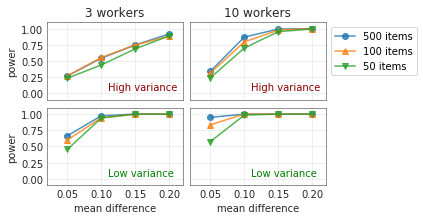

In [6]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 0.5
    plt.rcParams["grid.alpha"]  = 0.4
    #plt.rcParams["font.scale"]  = 1.5
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 3), sharex=True, sharey=True)

textx = 0.11
texty = 0.05

#sbn.set(font_scale=1.1)
plt.subplots_adjust(wspace=0.05, hspace=0.1)
markers = ['o', '^', 'v', 's', 'x']
subset = df[(df['settings'] == 'High var. settings') & (df['num.workers'] == 3)]
for n_i, n in enumerate([500, 100, 50]):
    rows = subset[subset['ex'] == n]
    x = rows['diff'].values
    y = rows['power'].values
    axes[0][0].plot(x, y, label=str(n), marker=markers[n_i], alpha=0.8)
axes[0][0].set_title('3 workers')
axes[0][0].text(textx, texty, 'High variance', c='darkred')

subset = df[(df['settings'] == 'High var. settings') & (df['num.workers'] == 10)]
for n_i, n in enumerate([500, 100, 50]):
    rows = subset[subset['ex'] == n]
    x = rows['diff'].values
    y = rows['power'].values
    axes[0][1].plot(x, y, label=str(n) + ' items', marker=markers[n_i], alpha=0.8)
axes[0][1].set_title('10 workers')
axes[0][1].text(textx, texty, 'High variance', c='darkred')

subset = df[(df['settings'] == 'Low var. settings') & (df['num.workers'] == 3)]
for n_i, n in enumerate([500, 100, 50]):
    rows = subset[subset['ex'] == n]
    x = rows['diff'].values
    y = rows['power'].values
    axes[1][0].plot(x, y, label=str(n) + ' items', marker=markers[n_i], alpha=0.8)
axes[1][0].text(textx, texty, 'Low variance', c='g')
    
subset = df[(df['settings'] == 'Low var. settings') & (df['num.workers'] == 10)]
for n_i, n in enumerate([500, 100, 50]):
    rows = subset[subset['ex'] == n]
    x = rows['diff'].values
    y = rows['power'].values
    axes[1][1].plot(x, y, label=str(n) + ' items', marker=markers[n_i], alpha=0.8)
axes[1][1].text(textx, texty, 'Low variance', c='g')      
    
axes[0][1].legend(loc='upper left', bbox_to_anchor=(1,1))    
axes[0][0].set_ylim(-0.1, 1.1)
axes[0][0].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
axes[0][0].set_xlim(0.02, 0.22)
axes[0][0].set_xticks([0.05, 0.1, 0.15, 0.2])
axes[0][0].set_ylabel('power')
axes[1][0].set_ylabel('power')
axes[1][0].set_xlabel('mean difference')
axes[1][1].set_xlabel('mean difference')

plt.savefig(os.path.join(output_dir, 'Figure06.pdf'), bbox_inches='tight')
plt.show();

